In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\niels\OneDrive\data_1\IBM.csv',usecols=['Date','Adj Close'])

df.set_index(['Date'],inplace=True)

df['IBM'] = df['Adj Close']
df.drop(['Adj Close'],axis=1,inplace=True)

df['SP500'] = pd.read_csv(r'C:\Users\niels\OneDrive\data_1\^GSPC.csv',usecols=['Adj Close']).values

df['Risk Free Rate'] = pd.read_csv(r'C:\Users\niels\OneDrive\data_1\^IRX.csv',usecols=['Adj Close']).values

df['IBM'] = df['IBM'].pct_change()
df['SP500'] = df['SP500'].pct_change()
df['Risk Free Rate'] = df['Risk Free Rate'] *0.01/12

df = df.iloc[2:]

df.head()

,IBM,SP500,Risk Free Rate
Date,,,
2010-06-01,-0.009158,-0.053882,0.000142
2010-07-01,0.039844,0.068778,0.000117
2010-08-01,-0.041043,-0.047449,0.000113
2010-09-01,0.094816,0.087551,0.000129
2010-10-01,0.070524,0.036856,0.000092


In [3]:
df['Risk Free Rate']

Date
2010-06-01    0.000142
2010-07-01    0.000117
2010-08-01    0.000113
2010-09-01    0.000129
2010-10-01    0.000092
                ...   
2019-01-01    0.001950
2019-02-01    0.001986
2019-03-01    0.001940
2019-04-01    0.001971
2019-04-11    0.001975
Name: Risk Free Rate, Length: 108, dtype: float64

In [4]:
df['IBM'] = df['IBM'] - df['Risk Free Rate']
df['SP500'] = df['SP500'] - df['Risk Free Rate']

In [5]:
df.head()

,IBM,SP500,Risk Free Rate
Date,,,
2010-06-01,-0.009299,-0.054024,0.000142
2010-07-01,0.039727,0.068661,0.000117
2010-08-01,-0.041156,-0.047562,0.000113
2010-09-01,0.094687,0.087422,0.000129
2010-10-01,0.070432,0.036764,0.000092


In [6]:
df.tail()

,IBM,SP500,Risk Free Rate
Date,,,
2019-01-01,0.180596,0.076734,0.001950
2019-02-01,0.025614,0.027743,0.001986
2019-03-01,0.031463,0.015984,0.001940
2019-04-01,0.017023,0.017053,0.001971
2019-04-11,-0.001975,-0.001975,0.001975


In [7]:
df = df.iloc[:-1]
df.tail()

,IBM,SP500,Risk Free Rate
Date,,,
2018-12-01,-0.075565,-0.093694,0.001917
2019-01-01,0.180596,0.076734,0.001950
2019-02-01,0.025614,0.027743,0.001986
2019-03-01,0.031463,0.015984,0.001940
2019-04-01,0.017023,0.017053,0.001971


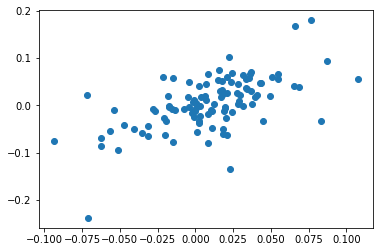

In [8]:
plt.scatter(df['SP500'],df['IBM']);

In [9]:
from scipy.stats import linregress

In [10]:
slope, intercept, r_value, p_value, std_err = linregress(df[['SP500','IBM']])

In [11]:
print(slope,intercept)

0.9655071347625879 -0.004005175608166176


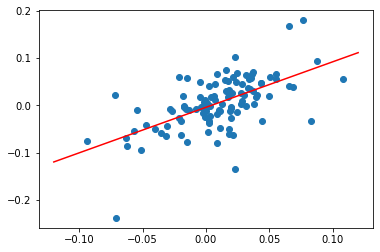

In [12]:
t = np.linspace(-0.12,0.12,100)
plt.scatter(df['SP500'],df['IBM']);
plt.plot(t,intercept + slope * t,c='r');

In [13]:
residuals = df['IBM'] - (intercept + slope * df['SP500'])

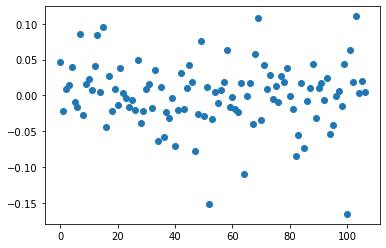

In [14]:
plt.scatter(range(len(df)),residuals);

In [15]:
np.mean(residuals)

1.2645647768802892e-18

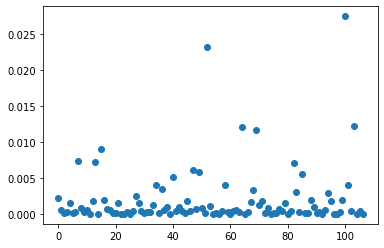

In [16]:
plt.scatter(range(len(df)),residuals**2);

In [17]:
residuals = residuals.values
residuals.sort()

In [18]:
p = np.linspace(0,1,len(df))

In [19]:
mu = residuals.mean()
sigma = residuals.std()

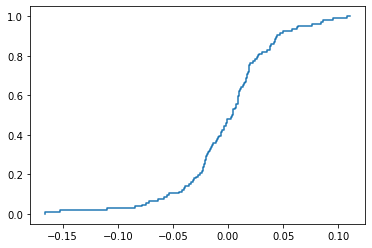

In [20]:
plt.step(residuals,p);

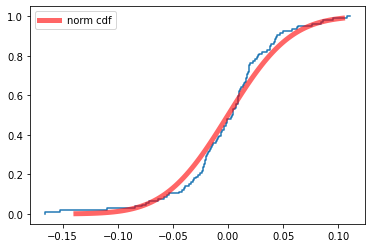

In [21]:
from scipy.stats import norm
fig, ax = plt.subplots()
plt.step(residuals,p);
x = np.linspace(sigma*norm.ppf(0.001),
                sigma * norm.ppf(0.99), 100)
ax.plot(x, norm.cdf(x/sigma),
      'r-', lw=5, alpha=0.6, label='norm cdf');
ax.legend();

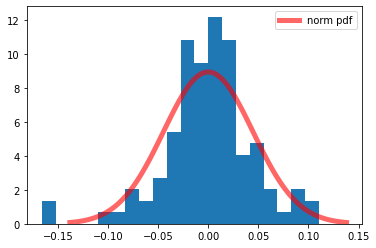

In [22]:
fig, ax = plt.subplots()
plt.hist(residuals,bins=20,density=True);

x = np.linspace(sigma*norm.ppf(0.001),
                sigma * norm.ppf(0.999), 100)
ax.plot(x, norm.pdf(x/sigma)/sigma,
      'r-', lw=5, alpha=0.6, label='norm pdf');
ax.legend();


In [23]:
from scipy.stats import kstest

kstest(residuals,'norm')

KstestResult(statistic=0.45600107383796196, pvalue=7.432879905776598e-21)

In [24]:
USSR = (residuals**2).sum()
USSR

0.21339180071528385

## Estimating the restricted model

In [25]:
z = (df['IBM'] - 0.7 * df['SP500']).values

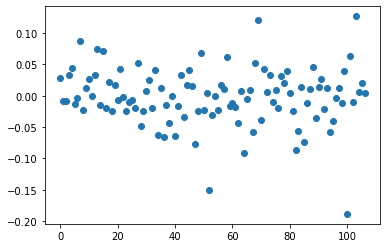

In [26]:
plt.scatter(range(len(z)),z);

In [27]:
residuals_res = z.mean() - z

In [28]:
RSSR = (residuals_res**2).sum()
RSSR

0.22249405192672114

In [29]:
F = (RSSR - USSR)/(USSR/(len(z)-2))

In [30]:
F

4.478786785608968

In [31]:
from scipy.stats import f

In [37]:
f.interval(0.90, 1, 105, loc=0, scale=1)

(0.00395098311823501, 3.9315564099949247)

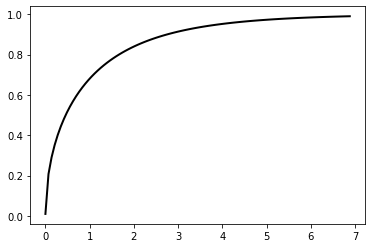

In [35]:
x = np.linspace(f.ppf(0.01, 1, 105),
                f.ppf(0.99, 1, 105), 100)

fig, ax = plt.subplots(1,1)
rv = f(1, 105)
ax.plot(x, rv.cdf(x), 'k-', lw=2, label='frozen pdf');

In [38]:
from sklearn.utils import resample

In [39]:
u = resample(residuals)
y_resampled = intercept + slope * df['SP500'].values + u

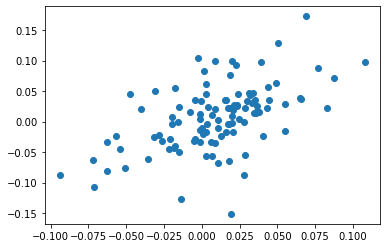

In [40]:
plt.scatter(df['SP500'],y_resampled);

In [41]:
slope_resampled, intercept_resampled, _,_,_ = linregress(df['SP500'],y_resampled)
print(slope_resampled,intercept_resampled)

0.8196186699003434 -0.000759111240212695


In [42]:
slopes = []
intercepts = []

for _ in range(10000):
    u = resample(residuals)
    y_ = (intercept + slope * df['SP500']).values + u
    slope_resamp, intercept_resamp,_,_,_ = linregress(df['SP500'],y_)
    slopes.append(slope_resamp)
    intercepts.append(intercept_resamp)
    


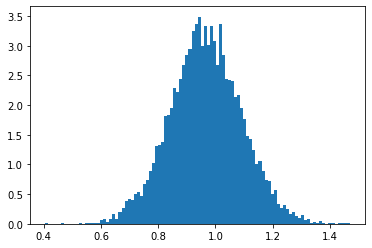

In [43]:
plt.hist(slopes,bins=100,density=True);

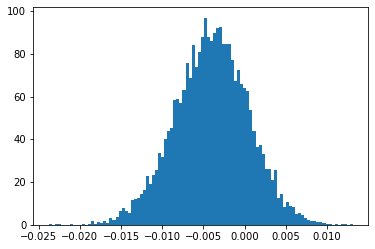

In [44]:
plt.hist(intercepts,bins=100,density=True);

In [45]:
gamma = 0.7
F_stats = []

for _ in range(10000):
    u = resample(residuals)
    y_ = (intercept + slope * df['SP500']).values + u
    slope_resamp, intercept_resamp,_,_,_ = linregress(df['SP500'],y_)
    res_resamp = y_ - (intercept_resamp + slope_resamp * df['SP500'].values)
    z = y_ - gamma * df['SP500'].values
    resid_rest_resampl = z.mean() - z
    USSR = (res_resamp**2).sum()
    RSSR = (resid_rest_resampl**2).sum()
    
    F = (RSSR - USSR)/(USSR/(len(z)-2))

  
    F_stats.append(F)

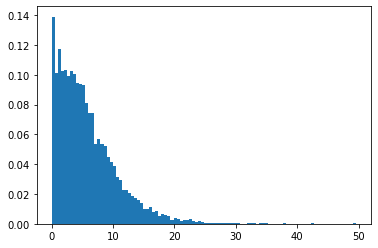

In [46]:
plt.hist(F_stats,bins=100,density=True);

In [48]:
t = np.linspace(0.01,1,10000)

In [49]:
F_stats.sort()

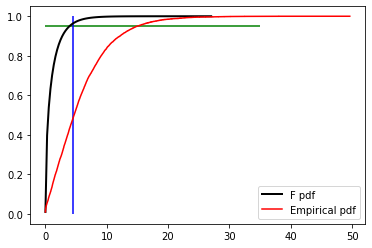

In [50]:

x = np.linspace(f.ppf(0.01, 1, 105),
                f.ppf(0.999999, 1, 105), 100)

fig, ax = plt.subplots(1,1)
rv = f(1, 105)
ax.plot(x, rv.cdf(x), 'k-', lw=2, label='F pdf');
plt.step(F_stats[:10000],t,c='r',label='Empirical pdf');
plt.hlines(0.95,0,35,colors='g')
plt.vlines(4.478786,0,1,colors='b')
ax.legend();
plt.legend();

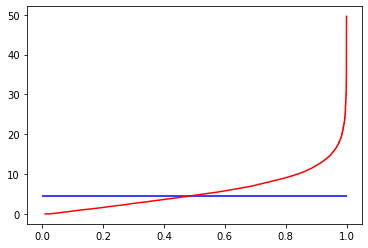

In [51]:
plt.step(t,F_stats[:10000],c='r');
plt.hlines(4.478786,0,1,colors='b');